In [1]:
import numpy as np
import random
from six.moves import cPickle
import matplotlib.pyplot as plt
import cvxpy as cvx

%matplotlib inline

#### Problem 4 
2) Write a python code to perform PCA. Since mean(x) = mean(y) = 0, normalization step (mean subtraction and rescaling) can be skipped.

In [2]:

x_reg = cPickle.load(open('./data_files/x_reg.pkl', 'rb'))
y_reg = cPickle.load(open('./data_files/y_reg.pkl', 'rb'))

In [4]:
x_reg = x_reg.reshape(-1, 1)
y_reg = y_reg.reshape(-1, 1)

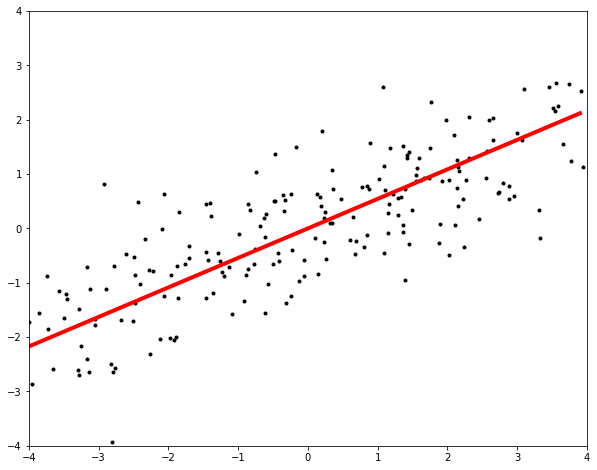

In [5]:
num_data = x_reg.size
data = np.hstack([x_reg, y_reg])
data = np.asmatrix(data)
S = 1 / (num_data - 1) * data.T * data

D, V = np.linalg.eig(S)
idx = np.argsort(-D)
D = D[idx]; V = V[:, idx]
h = V[1, 0] / V[0, 0]
xp = np.arange(-4, 4, 0.1)
yp = h * xp;

plt.figure(figsize = (10, 8))
plt.plot(x_reg, y_reg, 'k.')
plt.plot(xp, yp, 'r', linewidth = 4.0)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

#### Problem 5 
We want to find a major axis in a different way from what we learned in PCA class. Load PCA_data.

1) Plot the principal component (unit vector  u1) with the largest variance using PCA (i.e., eigen-analysis).

In [6]:
X = cPickle.load(open('./data_files/X.pkl', 'rb'))

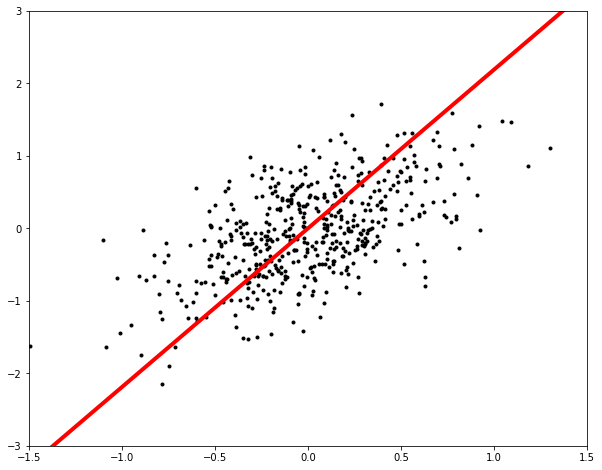

In [7]:
X = X.reshape(500,2)

X1 = X[:,0]
Y1 = X[:,1]
X1 = np.array(X1).reshape(-1, 1); Y1 = np.array(Y1).reshape(-1, 1)

data = np.hstack([X1, Y1])
data = np.asmatrix(data)
num_data = X1.size
S = 1 / (num_data - 1) * data.T * data
D, V = np.linalg.eig(S)
idx = np.argsort(-D)
D = D[idx]; V = V[:, idx]
h = V[1, 0] / V[0, 0]

xp = np.arange(-1.5, 1.5, 0.05)
yp = h * xp;

plt.figure(figsize=(10,8))
plt.plot(X1, Y1, 'k.')
plt.plot(xp, yp, 'r', linewidth = 4.0)
plt.xlim(-1.5, 1.5)
plt.ylim(-3,3)
plt.show()

2) Create an arbitrary unit vector  u
 . Then, multiply the sample variance matrix to  u
 . After each multiplication, normalize  u
  to make it an unit vector and observe (and plot) the direction of vector  u
 . Compare it with the principal vector  u1
  computed in 1). Are they pointing at the same (or opposite) direction? If the answer is yes, explain why they are parallel. (parallel = point either at the same or opposite direction)

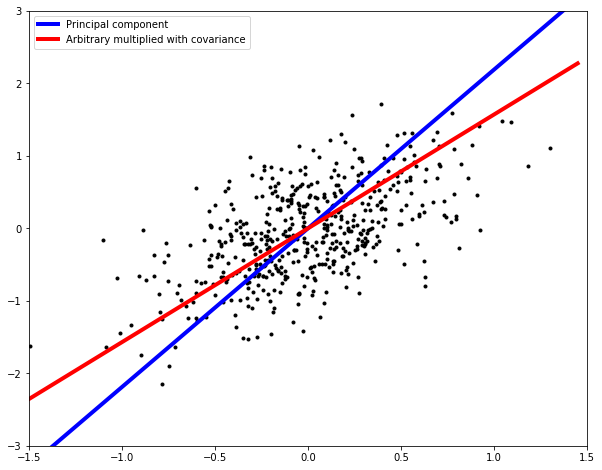

In [8]:
u = np.random.rand(2, 1)
u = u / np.linalg.norm(u, 2)
u = np.dot(S, u)
u = u / np.linalg.norm(u, 2)

h2 = u[1] / u[0]
xp2 = np.arange(-1.5, 1.5, 0.05)
yp2 = (h2 * xp).reshape(-1, 1)

plt.figure(figsize=(10, 8))
plt.plot(X1, Y1, 'k.')
plt.plot(xp, yp, 'b', linewidth = 4.0, label = 'Principal component')
plt.plot(xp2, yp2, 'r', linewidth = 4.0, label = 'Arbitrary multiplied with covariance')
plt.xlim(-1.5, 1.5)
plt.ylim(-3,3)
plt.legend()
plt.show()